**IMPORTS**

In [ ]:
from google.colab import drive
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

**DATA**

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset_path = '/content/gdrive/MyDrive/Major Project/Datasets/922'
os.chdir(dataset_path)

Checking Original Image Dimensions

Original Image Dimensions: (1280, 1280)


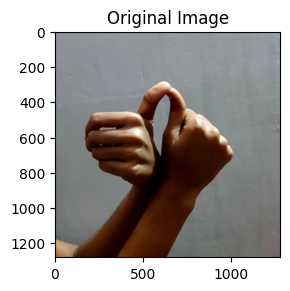

In [ ]:
original_image_path = '/content/gdrive/MyDrive/Major Project/Datasets/922/a/a (1).jpg'
original_image = Image.open(original_image_path)
# Display the original image & corresponding dimensions
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')

original_dimensions = original_image.size

print(f"Original Image Dimensions: {original_dimensions}")

plt.show()

Resizing Images & Converting it into Image Array

In [ ]:
# Specify the path to the main folder containing subfolders with images
main_folder_path = dataset_path
print(main_folder_path)

# List to store images as NumPy arrays
image_array_list = []
labels = []  # List to store labels

# Target dimensions for resizing
target_size = (64, 64)

# Iterate through each subfolder in the main folder
for label, subfolder_name in enumerate(sorted(os.listdir(main_folder_path))):
    subfolder_path = os.path.join(main_folder_path, subfolder_name)
    # Check if the current item is a subfolder
    if os.path.isdir(subfolder_path):
        # Iterate through each image file in the subfolder
        for filename in os.listdir(subfolder_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Adjust the file extensions as needed
                file_path = os.path.join(subfolder_path, filename)

                # Open, resize, and convert the image to a NumPy array
                with tf.keras.utils.CustomObjectScope({'GlorotUniform': tf.keras.initializers.glorot_uniform()}):
                    with tf.keras.utils.CustomObjectScope({'GlorotUniform': tf.keras.initializers.glorot_uniform()}):
                        with tf.keras.utils.CustomObjectScope({'GlorotUniform': tf.keras.initializers.glorot_uniform()}):
                            with tf.keras.utils.CustomObjectScope({'GlorotUniform': tf.keras.initializers.glorot_uniform()}):
                                #print(filename)
                                img_array = tf.keras.preprocessing.image.load_img(file_path, target_size=target_size)
                                img_array = tf.keras.preprocessing.image.img_to_array(img_array)
                                img_array = img_array / 255.0
                                # Append the image array to the list
                                image_array_list.append(img_array)
                                labels.append(label)
print("Image Array List Sample: ")
print(image_array_list)
print("Labels:")
print(labels)

Streaming output truncated to the last 5000 lines.
        [0.78, 0.78, 0.78],
        [0.78, 0.78, 0.78],
        ...,
        [0.67, 0.67, 0.67],
        [0.67, 0.67, 0.67],
        [0.62, 0.62, 0.62]]], dtype=float32), array([[[0.87, 0.87, 0.87],
        [0.87, 0.87, 0.87],
        [0.87, 0.87, 0.87],
        ...,
        [0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89]],

       [[0.87, 0.87, 0.87],
        [0.87, 0.87, 0.87],
        [0.87, 0.87, 0.87],
        ...,
        [0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89]],

       [[0.86, 0.86, 0.86],
        [0.86, 0.86, 0.86],
        [0.87, 0.87, 0.87],
        ...,
        [0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89],
        [0.89, 0.89, 0.89]],

       ...,

       [[0.7 , 0.7 , 0.7 ],
        [0.71, 0.71, 0.71],
        [0.71, 0.71, 0.71],
        ...,
        [0.66, 0.66, 0.66],
        [0.66, 0.66, 0.66],
        [0.66, 0.66, 0.66]],

       [[0.7 , 0.7 , 0.7 ],
     

Image Array -> Numpy Array

In [ ]:
# Convert the list of image arrays to a NumPy array
images_np_array = np.array(image_array_list)
labels = np.array(labels)

**MODEL**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_np_array, labels, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train:", images_np_array.shape)
print("Shape of X_test:", images_np_array.shape)
print("Shape of y_train:", images_np_array.shape)
print("Shape of y_test:", images_np_array.shape)

Shape of X_train: (738, 64, 64, 3)
Shape of X_test: (738, 64, 64, 3)
Shape of y_train: (738, 64, 64, 3)
Shape of y_test: (738, 64, 64, 3)


In [ ]:
# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

In [ ]:
# Freeze the layers of the pre-trained VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of the second last layer
flatten_layer = layers.Flatten()(base_model.layers[-2].output)

# Add a Dense layer with 512 units and sigmoid activation
dense_layer_1 = layers.Dense(512, activation='sigmoid')(flatten_layer)

# Add another Dense layer with the number of classes and softmax activation
num_classes = len(np.unique(labels))
output_layer = layers.Dense(num_classes, activation='softmax')(dense_layer_1)

In [ ]:
# Create the final model
model = models.Model(inputs=base_model.input, outputs=output_layer)
# print(model)
# print(model.summary())

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

**VISUALIZATION**

1/1 [==============================] - 0s 179ms/step


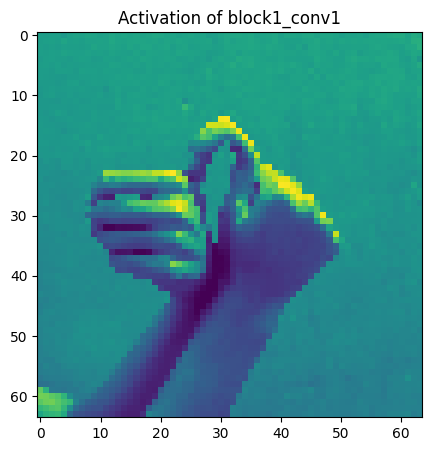

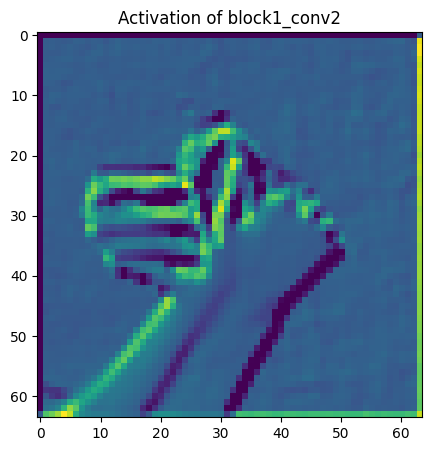

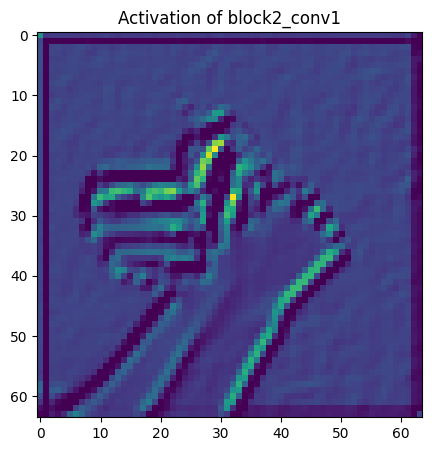

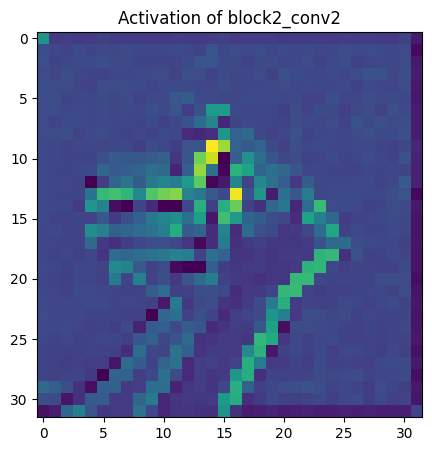

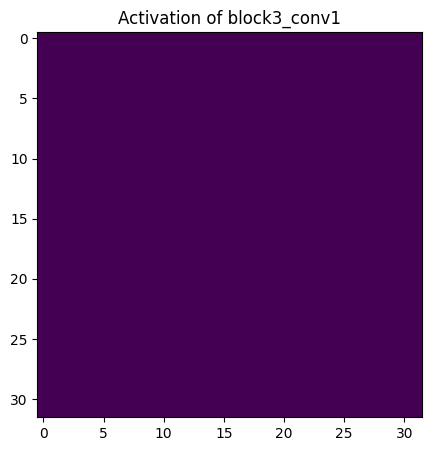

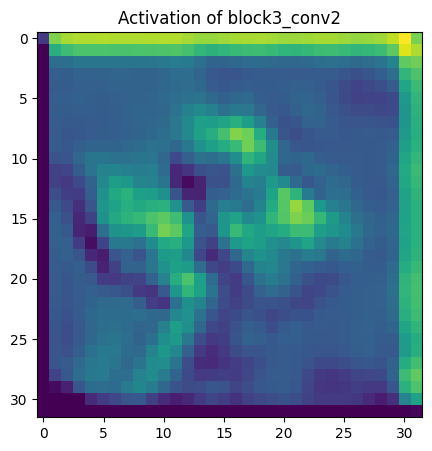

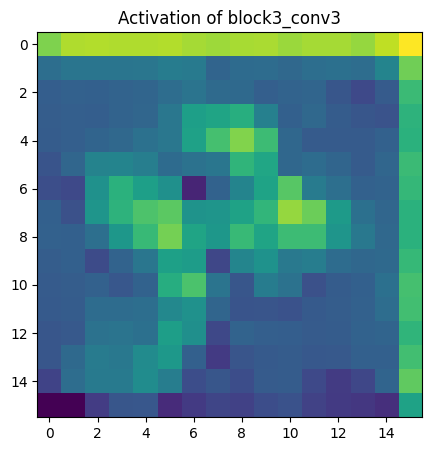

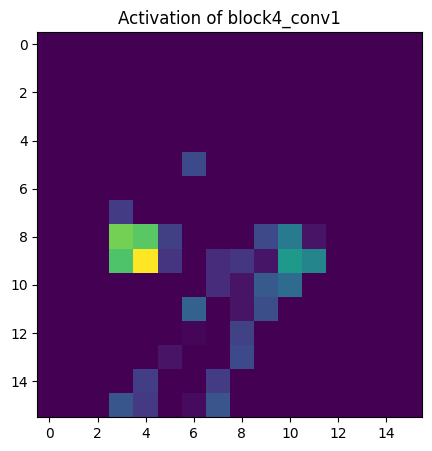

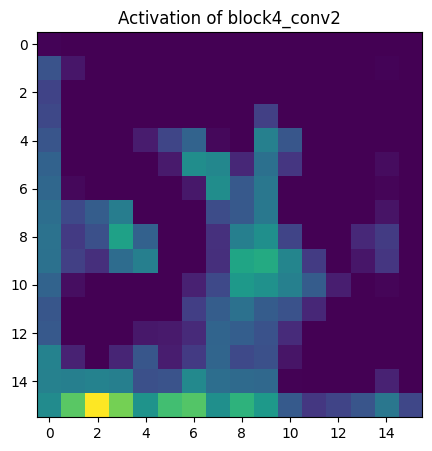

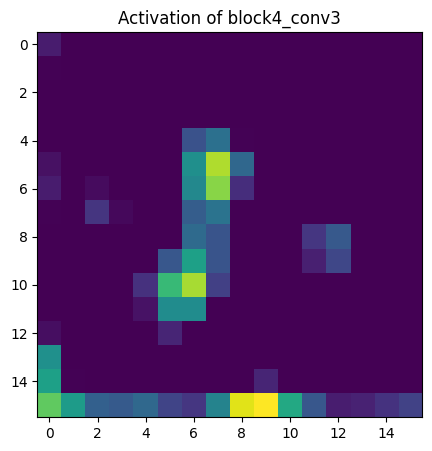

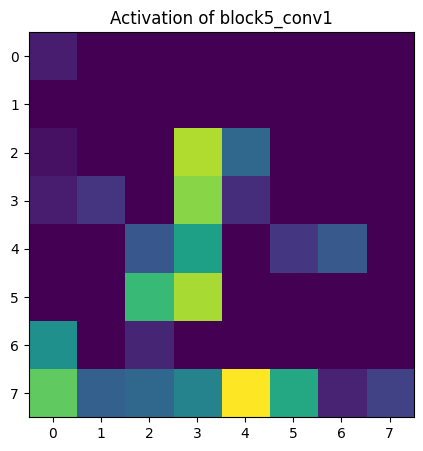

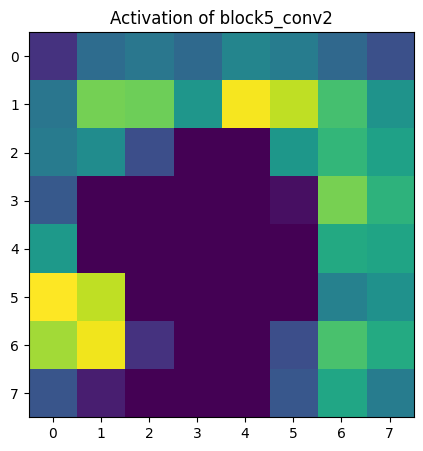

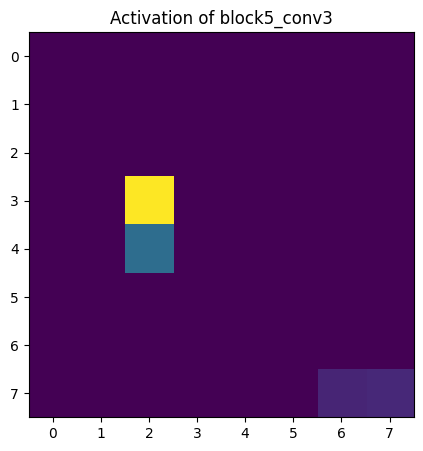

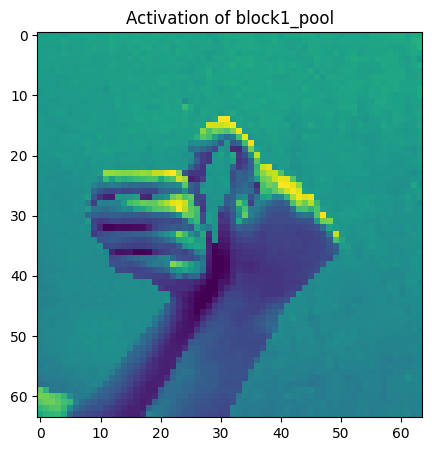

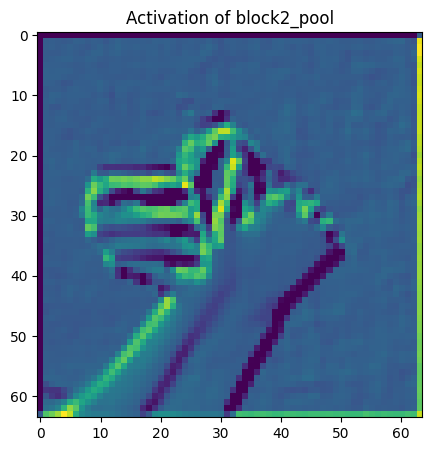

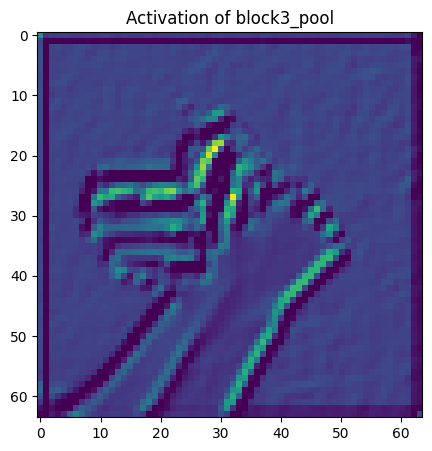

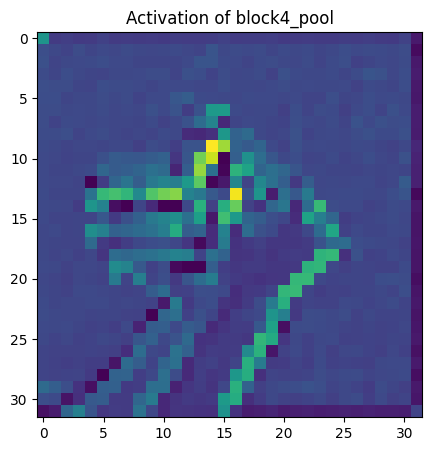

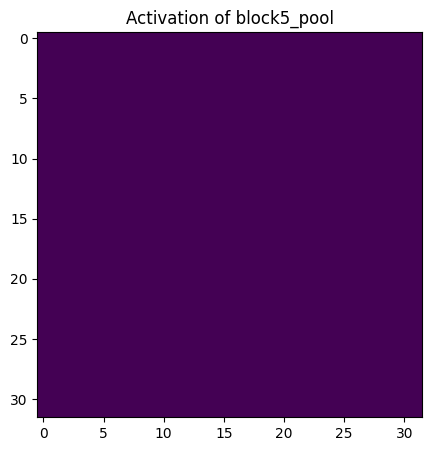

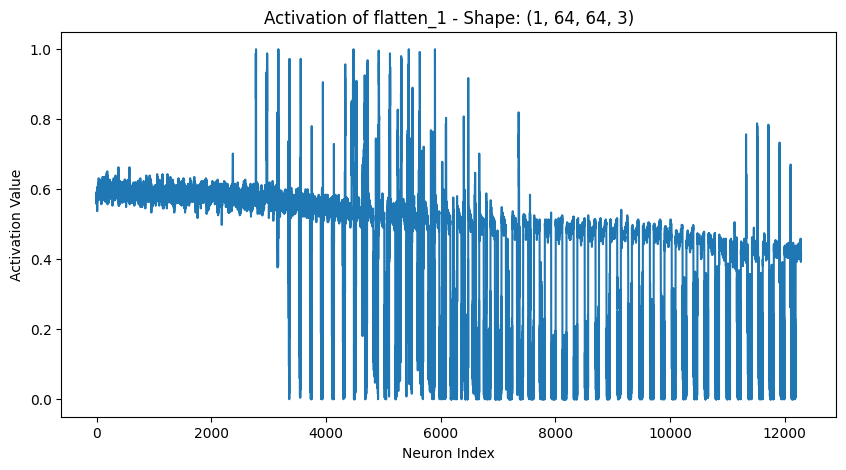

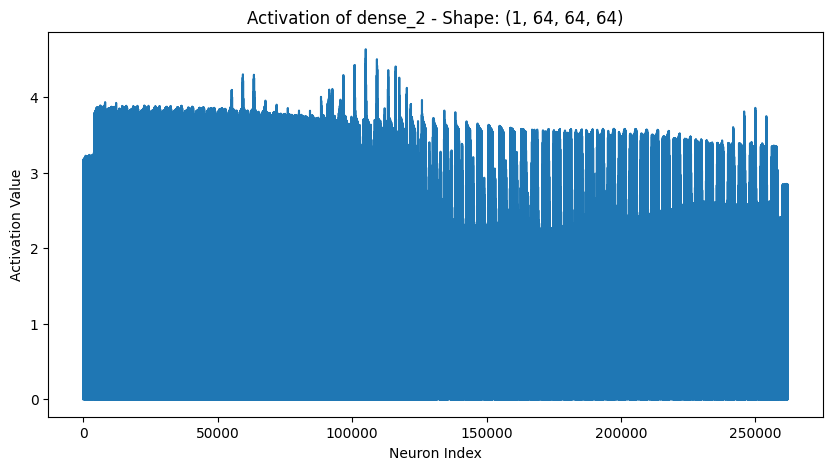

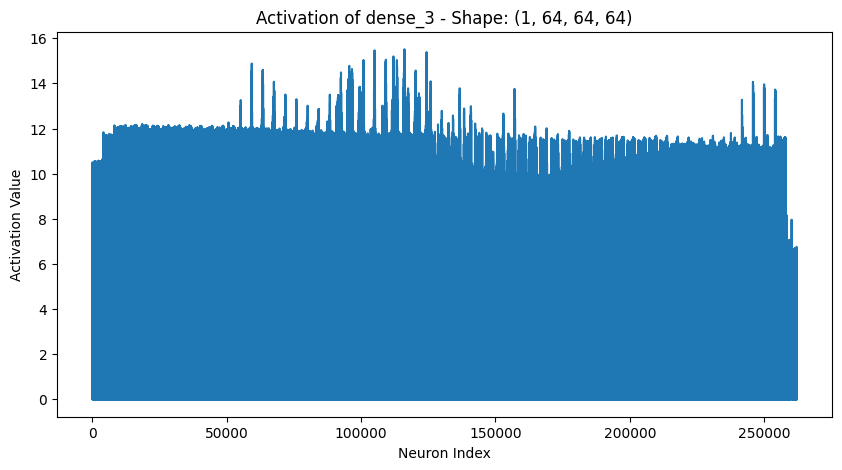

In [ ]:
# Assuming x.jpg is the image you want to visualize
image_path = '/content/gdrive/MyDrive/Major Project/Datasets/922/a/a (1).jpg'

# Load and preprocess the image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Create a new model that outputs the activations of each layer
layer_outputs = [layer.output for layer in base_model.layers]
activation_model = models.Model(inputs=base_model.input, outputs=layer_outputs)

# Get the layer names for each type of layer
conv_layer_names = [layer.name for layer in base_model.layers if 'conv' in layer.name.lower()]
pooling_layer_names = [layer.name for layer in base_model.layers if 'pool' in layer.name.lower()]
dense_layer_names = ['flatten_1','dense_2','dense_3']

# Get the activations for each layer
activations = activation_model.predict(img_array)

# Display the activations for convolutional layers
for layer_name, activation in zip(conv_layer_names, activations):
    plt.figure(figsize=(10, 5))
    plt.imshow(activation[0, :, :, 0], cmap='viridis')
    plt.title(f'Activation of {layer_name}')
    plt.show()

# Display the activations for pooling layers
for layer_name, activation in zip(pooling_layer_names, activations):
    plt.figure(figsize=(10, 5))
    plt.imshow(activation[0, :, :, 0], cmap='viridis')
    plt.title(f'Activation of {layer_name}')
    plt.show()

# Display the activations for dense layers
for layer_name, activation in zip(dense_layer_names, activations):
  plt.figure(figsize=(10, 5))

    # Flatten the activation tensor if needed
  flattened_activation = activation[0] if len(activation.shape) == 2 else np.ravel(activation[0])

  plt.plot(flattened_activation)
  plt.title(f'Activation of {layer_name} - Shape: {activation.shape}')
  plt.xlabel('Neuron Index')
  plt.ylabel('Activation Value')
  plt.show()

**COMPILATION**

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=35, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/35
19/19 [==============================] - 5s 120ms/step - loss: 3.4274 - accuracy: 0.2373 - val_loss: 2.5112 - val_accuracy: 0.4527
Epoch 2/35
19/19 [==============================] - 0s 24ms/step - loss: 1.7808 - accuracy: 0.5729 - val_loss: 1.8274 - val_accuracy: 0.5000
Epoch 3/35
19/19 [==============================] - 0s 20ms/step - loss: 1.2213 - accuracy: 0.7305 - val_loss: 1.6176 - val_accuracy: 0.5946
Epoch 4/35
19/19 [==============================] - 0s 24ms/step - loss: 0.8727 - accuracy: 0.8356 - val_loss: 1.3923 - val_accuracy: 0.6284
Epoch 5/35
19/19 [==============================] - 0s 24ms/step - loss: 0.6980 - accuracy: 0.8729 - val_loss: 1.2993 - val_accuracy: 0.6149
Epoch 6/35
19/19 [==============================] - 0s 22ms/step - loss: 0.5058 - accuracy: 0.9339 - val_loss: 1.1784 - val_accuracy: 0.6486
Epoch 7/35
19/19 [==============================] - 0s 23ms/step - loss: 0.4243 - accuracy: 0.9458 - val_loss: 1.1281 - val_accuracy: 0.6486
Epoch 8/35
1

**METRICS**

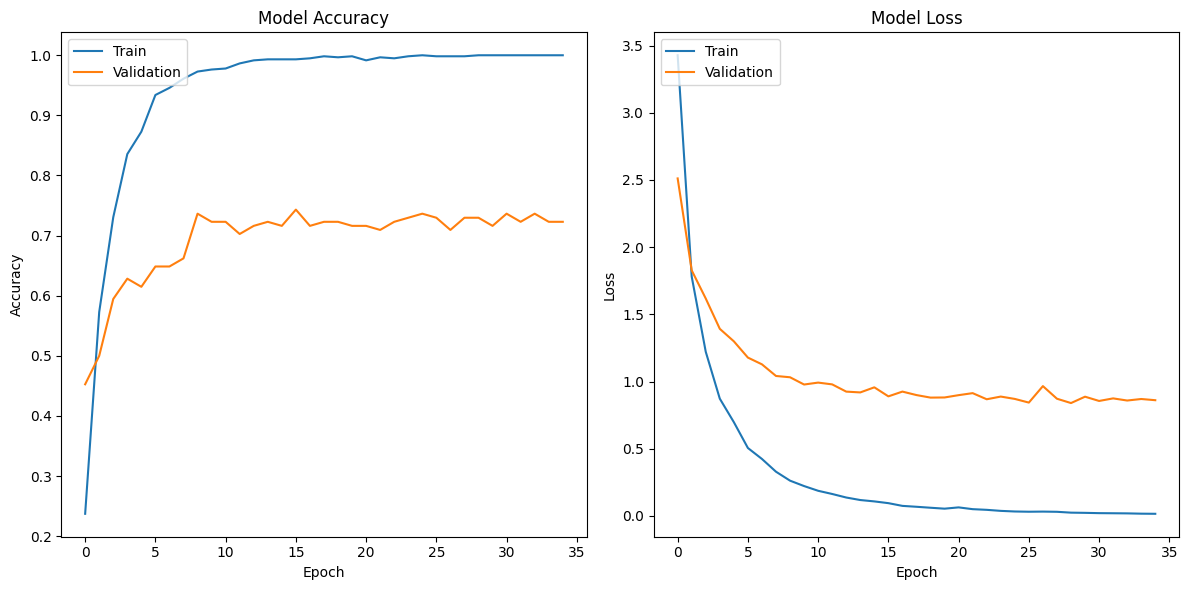

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

5/5 [==============================] - 0s 21ms/step - loss: 0.8613 - accuracy: 0.7230
Test Accuracy: 72.30%


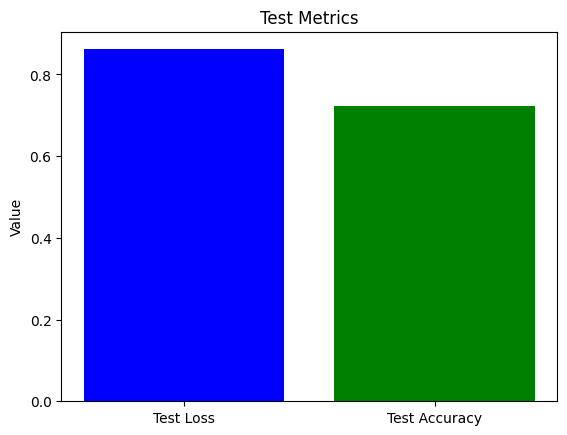

In [ ]:
labels = ['Test Loss', 'Test Accuracy']
values = [test_loss, test_accuracy]

plt.bar(labels, values, color=['blue', 'green'])
plt.title('Test Metrics')
plt.ylabel('Value')
plt.show()